In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#load an exaple dataset from sklearn
from sklearn.datasets import load_iris
#create a pandas df from iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
#print the df
print(df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


<AxesSubplot:>

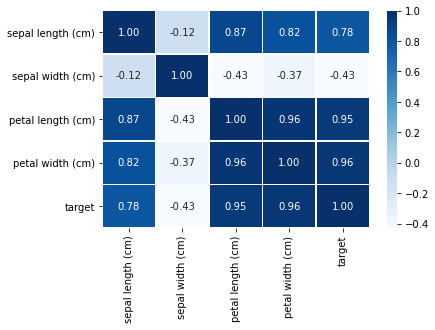

In [43]:
#seaborn heatmap with correlation matrix with blue colormap and no scale bar
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', linewidths=.5)


In [44]:
#change column names to match the iris dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
#change column names. for example: sepal_length to sepalLength and so on
df.columns = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'target']


In [45]:
#copy the df to a new df
df_new = df.copy()

#add a new column sepal_length/sepal_width

df_new.insert(0, 'sepal_length_width', df['sepalLength']/df['sepalWidth'])
#check if sepalLength is an outlier and then add a new column named sepalOutlier if it is
df_new['sepalOutlier'] = df_new['sepalLength'] > 2
#print the 0.8 quantile of sepalLength
print(df_new['sepalLength'].quantile(0.8))


#add a new column named datetime with a random datetime
df_new['datetime'] = pd.date_range('1/1/2018', '1/1/2022', periods=len(df_new))
#add a new column names date with the column datetime converted into a date with format YYYYmmdd
df_new['date'] = df_new['datetime'].dt.strftime('%Y%m%d')
#add a new column named weekday with the column datetime converted into a weekday name
df_new['weekday'] = df_new['datetime'].dt.strftime('%A')
#add a new column named hour with the column datetime converted into a hour
df_new['hour'] = df_new['datetime'].dt.hour
#calculate petalwidth percentile, round it to two decimals and add it to a new column
# df_new['petalWidth_percentile'] = df_new['petalWidth'].rank(pct=True).round(2)


# for loop that calculates the percentile of each column and adds it to a new column
# for column in df_new.columns:
#     df_new[column + '_percentile'] = df_new[column].rank(pct=True).round(2)


#import norm from scipy
from scipy import stats
#calculate the probability density function of each int or float column and add it to a new column
# for column in df_new.select_dtypes(include=['int64', 'float64']).columns:
#     df_new[column + '_pdf'] = stats.norm.pdf(df_new[column])


#calculate multivariate normal distribution of sepalLength and sepalWidth and add it to a new column
#calculate meand an covariance matrix
meand = df_new[['sepalLength', 'sepalWidth']].mean()
covariance = df_new[['sepalLength', 'sepalWidth']].cov()
#calculate the multivariate normal distribution
df_new['sepalLength_sepalWidth_mvn'] = stats.multivariate_normal.pdf(df_new[['sepalLength', 'sepalWidth']], meand, covariance)


#insert a new column in the first position with a random number between 1 and 100
df_new.insert(0, 'id', pd.Series(np.random.randint(1, 100, len(df_new))))

df_new.sample(5)

6.5200000000000005


,id,sepal_length_width,sepalLength,sepalWidth,petalLength,petalWidth,target,sepalOutlier,datetime,date,weekday,hour,sepalLength_sepalWidth_mvn
102,34,2.366667,7.1,3.0,5.9,2.1,2,True,2020-09-27 03:32:37.046979856,20200927,Sunday,3,0.140227
141,75,2.225806,6.9,3.1,5.1,2.3,2,True,2021-10-14 13:22:08.859060400,20211014,Thursday,13,0.190678
115,17,2.000000,6.4,3.2,5.3,2.3,2,True,2021-02-01 14:49:07.651006704,20210201,Monday,14,0.325786
5,20,1.384615,5.4,3.9,1.7,0.4,0,True,2018-02-19 00:38:39.463087248,20180219,Monday,0,0.065297
126,3,2.214286,6.2,2.8,4.8,1.8,2,True,2021-05-20 11:26:10.469798656,20210520,Thursday,11,0.349132


In [57]:
df_new.shape

(150, 14)

In [80]:
#for each row, generate a random string concatenating 8 characters or numbers
df_new['random_string'] = df_new.apply(lambda x: ''.join(np.random.choice(list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ&*#'), 8)), axis=1)

#if random_string contains all digits  add 1 to a new column
df_new['random_string_all_digits'] = df_new['random_string'].apply(lambda x: 1 if x.isdigit() else 0)
#if random_string contains all letters add 1 to a new column
df_new['random_string_all_letters'] = df_new['random_string'].apply(lambda x: 1 if x.isalpha() else 0)
df_new.sample(5)

#if random_index contains a symbol, extract all the digits following the # and add it to a new column, else keep
# if random_index contains a symbol, extract all the digits following the # and add it to a new column, else keep nan

 
df_new.head()

,id,sepal_length_width,sepalLength,sepalWidth,petalLength,petalWidth,target,sepalOutlier,datetime,date,weekday,hour,sepalLength_sepalWidth_mvn,last30days,random_string,random_string_symbol,random_string_symbol_index,random_string_all_digits,random_string_all_letters,random_string_digits
0,24,1.457143,5.1,3.5,1.4,0.2,0,True,2018-01-01 00:00:00.000000000,20180101,Monday,0,0.195019,5.900000,HVCXT8SR,NaN,-1,0,0,NaN
1,88,1.633333,4.9,3.0,1.4,0.2,0,True,2018-01-10 19:19:43.892617449,20180110,Wednesday,19,0.223922,4.900000,E1005L&9,NaN,-1,0,0,NaN
2,84,1.468750,4.7,3.2,1.3,0.2,0,True,2018-01-20 14:39:27.785234899,20180120,Saturday,14,0.168834,5.850000,*UDXQ6*B,NaN,-1,0,0,NaN
3,74,1.483871,4.6,3.1,1.5,0.2,0,True,2018-01-30 09:59:11.677852349,20180130,Tuesday,9,0.143387,5.433333,R4F9J2YE,NaN,-1,0,0,NaN
4,12,1.388889,5.0,3.6,1.4,0.2,0,True,2018-02-09 05:18:55.570469798,20180209,Friday,5,0.139114,5.860000,XAQ5U9CX,NaN,-1,0,0,NaN


In [88]:
#new list with strings quilmes, brahma
brands = ['quilmes', 'brahma', 'budweiser']
calibres = ['lata', 'litro']
#add a new column with a random brand from the list brands + space + a random calibre from the list calibres
df_new['brand_calibre'] = df_new['random_string'].apply(lambda x: np.random.choice(brands) + ' ' + np.random.choice(calibres))
df_new.head()

#extract the first word from brand_calibre
#pivot brand_calibre in columns and count the number of times each brand appears
df_new['brand'] = df_new['brand_calibre'].apply(lambda x: x.split(' ')[0])
df_new['calibre'] = df_new['brand_calibre'].apply(lambda x: x.split(' ')[1])
#brand to dummies
df_new = pd.get_dummies(df_new, columns=['brand'])


df_new.head()

,id,sepal_length_width,sepalLength,sepalWidth,petalLength,petalWidth,target,sepalOutlier,datetime,date,...,random_string_symbol,random_string_symbol_index,random_string_all_digits,random_string_all_letters,random_string_digits,brand_calibre,calibre,brand_brahma,brand_budweiser,brand_quilmes
0,24,1.457143,5.1,3.5,1.4,0.2,0,True,2018-01-01 00:00:00.000000000,20180101,...,NaN,-1,0,0,NaN,brahma litro,litro,1,0,0
1,88,1.633333,4.9,3.0,1.4,0.2,0,True,2018-01-10 19:19:43.892617449,20180110,...,NaN,-1,0,0,NaN,brahma lata,lata,1,0,0
2,84,1.468750,4.7,3.2,1.3,0.2,0,True,2018-01-20 14:39:27.785234899,20180120,...,NaN,-1,0,0,NaN,quilmes lata,lata,0,0,1
3,74,1.483871,4.6,3.1,1.5,0.2,0,True,2018-01-30 09:59:11.677852349,20180130,...,NaN,-1,0,0,NaN,budweiser litro,litro,0,1,0
4,12,1.388889,5.0,3.6,1.4,0.2,0,True,2018-02-09 05:18:55.570469798,20180209,...,NaN,-1,0,0,NaN,budweiser lata,lata,0,1,0


In [121]:


#repeat x times and save the results to mean_array and std_array
mean_array = []
std_array = []
for i in range(3000):
    sample = df_new['sepalLength'].sample(30)
    mean_array.append(sample.mean())
    std_array.append(sample.std())  

# #calculate the 95% confidence interval of mean_array
mean_array_ci = stats.norm.interval(0.99, loc=np.mean(mean_array), scale=np.std(mean_array)/np.sqrt(len(mean_array)))
print(mean_array_ci)

#transform tuple mean_array_ci to list and save it to mean_array_ci_list
mean_array_ci_list = list(mean_array_ci)
#add to a new df


(5.839494474510894, 5.851998858822438)


ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

In [101]:
np.mean(mean_array), np.std(mean_array)


(5.845866666666666, 0.13950158899931328)

In [102]:
mean_array

[5.530000000000001,
 6.096666666666666,
 5.826666666666664,
 5.989999999999998,
 5.929999999999999,
 5.8999999999999995,
 5.84,
 5.8166666666666655,
 5.773333333333335,
 5.953333333333331,
 5.973333333333333,
 5.943333333333332,
 5.696666666666667,
 5.989999999999999,
 5.623333333333333,
 5.776666666666668,
 5.973333333333332,
 5.659999999999999,
 5.890000000000001,
 5.776666666666667,
 5.98,
 5.956666666666667,
 5.876666666666667,
 5.873333333333335,
 5.613333333333334,
 5.903333333333333,
 5.616666666666668,
 5.839999999999999,
 5.743333333333333,
 5.936666666666666,
 5.933333333333333,
 5.716666666666668,
 5.703333333333332,
 5.916666666666668,
 5.819999999999999,
 5.923333333333333,
 5.766666666666666,
 5.8,
 5.64,
 5.8199999999999985,
 5.923333333333333,
 5.946666666666666,
 5.713333333333334,
 5.883333333333334,
 5.553333333333334,
 6.090000000000001,
 5.879999999999998,
 5.946666666666668,
 5.6499999999999995,
 5.876666666666667,
 5.8900000000000015,
 5.880000000000001,
 5.69333